In [76]:
from huggingface_hub import list_datasets


In [77]:
all_datasets = list_datasets()
# all_datasets =list(all_datasets)

In [78]:
print(all_datasets)

<generator object HfApi.list_datasets at 0x0000026AB02BF9E0>


In [79]:
# print(all_datasets[:10])

In [80]:
# print(f'there are {len(all_datasets)} datasets currently available')

In [81]:
from datasets import load_dataset

In [82]:
emtions= load_dataset('emotion',trust_remote_code=True)

In [83]:
print(emtions)

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 16000
    })
    validation: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
})


In [84]:
train_ds = emtions['train']
train_ds

Dataset({
    features: ['text', 'label'],
    num_rows: 16000
})

In [85]:
len(train_ds)

16000

In [86]:
train_ds[0]

{'text': 'i didnt feel humiliated', 'label': 0}

In [87]:
train_ds.column_names

['text', 'label']

In [88]:
print(train_ds.features)

{'text': Value(dtype='string', id=None), 'label': ClassLabel(names=['sadness', 'joy', 'love', 'anger', 'fear', 'surprise'], id=None)}


In [89]:
train_ds[:5]

{'text': ['i didnt feel humiliated',
  'i can go from feeling so hopeless to so damned hopeful just from being around someone who cares and is awake',
  'im grabbing a minute to post i feel greedy wrong',
  'i am ever feeling nostalgic about the fireplace i will know that it is still on the property',
  'i am feeling grouchy'],
 'label': [0, 0, 3, 2, 3]}

In [90]:
train_ds['text'][:5]

['i didnt feel humiliated',
 'i can go from feeling so hopeless to so damned hopeful just from being around someone who cares and is awake',
 'im grabbing a minute to post i feel greedy wrong',
 'i am ever feeling nostalgic about the fireplace i will know that it is still on the property',
 'i am feeling grouchy']

In [91]:
import pandas as pd

In [92]:
emtions.set_format(type='pandas')
df =emtions['train'][:]
df.head()

,text,label
0,i didnt feel humiliated,0
1,i can go from feeling so hopeless to so damned...,0
2,im grabbing a minute to post i feel greedy wrong,3
3,i am ever feeling nostalgic about the fireplac...,2
4,i am feeling grouchy,3


In [93]:
def label_int2str(row):
    return emtions['train'].features['label'].int2str(row)

In [94]:
erm = emtions['train'].features['label']
erm

ClassLabel(names=['sadness', 'joy', 'love', 'anger', 'fear', 'surprise'], id=None)

In [95]:
df['label_name']=df['label'].apply(label_int2str)
df.head()

,text,label,label_name
0,i didnt feel humiliated,0,sadness
1,i can go from feeling so hopeless to so damned...,0,sadness
2,im grabbing a minute to post i feel greedy wrong,3,anger
3,i am ever feeling nostalgic about the fireplac...,2,love
4,i am feeling grouchy,3,anger


In [96]:
import matplotlib.pyplot as plt

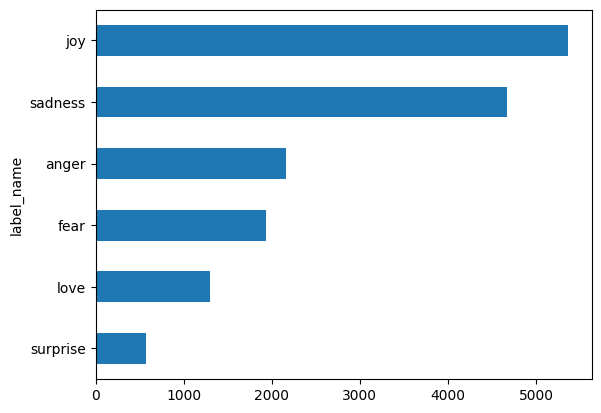

In [97]:
df['label_name'].value_counts(ascending=True).plot.barh()
plt.show()

In [98]:
df['words per tweet']=df['text'].str.split().apply(len)
df.head()

,text,label,label_name,words per tweet
0,i didnt feel humiliated,0,sadness,4
1,i can go from feeling so hopeless to so damned...,0,sadness,21
2,im grabbing a minute to post i feel greedy wrong,3,anger,10
3,i am ever feeling nostalgic about the fireplac...,2,love,18
4,i am feeling grouchy,3,anger,4


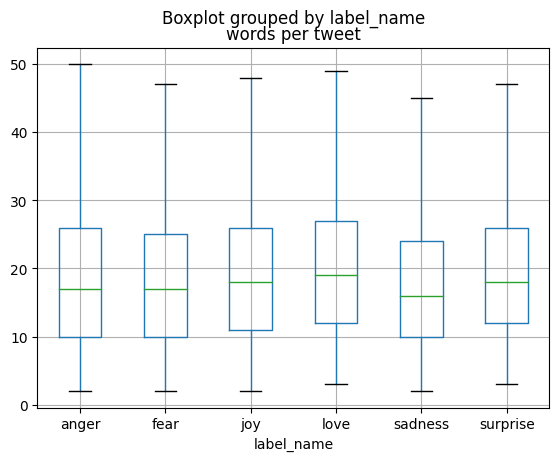

In [99]:
df.boxplot(column='words per tweet',by='label_name',showfliers=False)
plt.show()

In [100]:
emtions.set_format()

In [101]:
text='tokening text is a core task of nlp'
tokens=list(text)
print(tokens)

['t', 'o', 'k', 'e', 'n', 'i', 'n', 'g', ' ', 't', 'e', 'x', 't', ' ', 'i', 's', ' ', 'a', ' ', 'c', 'o', 'r', 'e', ' ', 't', 'a', 's', 'k', ' ', 'o', 'f', ' ', 'n', 'l', 'p']


In [102]:
token2idx ={ch:idx for idx,ch in enumerate(sorted(set(tokens)))}

In [103]:
token2idx

{' ': 0,
 'a': 1,
 'c': 2,
 'e': 3,
 'f': 4,
 'g': 5,
 'i': 6,
 'k': 7,
 'l': 8,
 'n': 9,
 'o': 10,
 'p': 11,
 'r': 12,
 's': 13,
 't': 14,
 'x': 15}

In [104]:
input_ids =[token2idx[token] for token in tokens]
input_ids

[14,
 10,
 7,
 3,
 9,
 6,
 9,
 5,
 0,
 14,
 3,
 15,
 14,
 0,
 6,
 13,
 0,
 1,
 0,
 2,
 10,
 12,
 3,
 0,
 14,
 1,
 13,
 7,
 0,
 10,
 4,
 0,
 9,
 8,
 11]

In [105]:
import torch
import torch.nn.functional as F

In [106]:
input_ids = torch.tensor(input_ids)
one_hot_encoding= F.one_hot(input_ids, num_classes=len(token2idx))
one_hot_encoding

tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
        [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
        [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
        [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 1,

In [107]:
one_hot_encoding.shape

torch.Size([35, 16])

In [108]:
one_hot_encoding.size(0)

35

In [109]:
one_hot_encoding.size(1)

16

In [110]:
tokenized_text = text.split()
tokenized_text

['tokening', 'text', 'is', 'a', 'core', 'task', 'of', 'nlp']

In [111]:
from transformers import AutoTokenizer

In [112]:
model_ckpt = 'distilbert-base-uncased'
tokenizer = AutoTokenizer.from_pretrained(model_ckpt)

In [113]:
from transformers import DistilBertTokenizer
distilbert_tokenizer = DistilBertTokenizer.from_pretrained(model_ckpt)

In [114]:
encoded_text =tokenizer(text)
encoded_text

{'input_ids': [101, 19204, 2075, 3793, 2003, 1037, 4563, 4708, 1997, 17953, 2361, 102], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}

In [115]:
tokens =tokenizer.convert_ids_to_tokens(encoded_text.input_ids)
tokens

['[CLS]',
 'token',
 '##ing',
 'text',
 'is',
 'a',
 'core',
 'task',
 'of',
 'nl',
 '##p',
 '[SEP]']

In [116]:
print(tokenizer.convert_tokens_to_string(tokens))

[CLS] tokening text is a core task of nlp [SEP]


In [117]:
tokenizer.vocab_size

30522

In [118]:
tokenizer.model_max_length

512

In [119]:
def tokenize(batch):
    return tokenizer(batch['text'],padding=True,truncation=True)

In [120]:
tokenize(emtions['train'][:2])

{'input_ids': [[101, 1045, 2134, 2102, 2514, 26608, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [101, 1045, 2064, 2175, 2013, 3110, 2061, 20625, 2000, 2061, 9636, 17772, 2074, 2013, 2108, 2105, 2619, 2040, 14977, 1998, 2003, 8300, 102]], 'attention_mask': [[1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]]}

In [121]:
# 在定义完处理函数之后，我们可以通过一行代码将该函数应用到语料库整个数据集：
emtions_encoded = emtions.map(tokenize,batched=True,batch_size=None)

In [122]:
emtions_encoded['train'].column_names

['text', 'label', 'input_ids', 'attention_mask']

In [123]:
from transformers import AutoModel
import torch

model_ckpt = 'distilbert-base-uncased'
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = AutoModel.from_pretrained(model_ckpt).to(device)
torch.cuda.is_available()

False

In [124]:
from transformers import AutoTokenizer

model_ckpt = 'distilbert-base-uncased'
tokenizer = AutoTokenizer.from_pretrained(model_ckpt)

In [125]:
text = 'this is a test'
inputs = tokenizer(text, return_tensors='pt')
inputs['input_ids'].size()

torch.Size([1, 6])

In [126]:
inputs.items()

dict_items([('input_ids', tensor([[ 101, 2023, 2003, 1037, 3231,  102]])), ('attention_mask', tensor([[1, 1, 1, 1, 1, 1]]))])

In [127]:
inputs = {k:v.to(device) for k,v in inputs.items()}
inputs

{'input_ids': tensor([[ 101, 2023, 2003, 1037, 3231,  102]]),
 'attention_mask': tensor([[1, 1, 1, 1, 1, 1]])}

In [128]:
with torch.no_grad():
    outputs = model(**inputs)
outputs

BaseModelOutput(last_hidden_state=tensor([[[-0.1565, -0.1862,  0.0528,  ..., -0.1188,  0.0662,  0.5470],
         [-0.3575, -0.6484, -0.0618,  ..., -0.3040,  0.3508,  0.5221],
         [-0.2772, -0.4459,  0.1818,  ..., -0.0948, -0.0076,  0.9958],
         [-0.2841, -0.3917,  0.3753,  ..., -0.2151, -0.1173,  1.0526],
         [ 0.2661, -0.5094, -0.3180,  ..., -0.4203,  0.0144, -0.2149],
         [ 0.9441,  0.0112, -0.4714,  ...,  0.1439, -0.7288, -0.1619]]]), hidden_states=None, attentions=None)

In [129]:
outputs.last_hidden_state.size()

torch.Size([1, 6, 768])

In [130]:
outputs.last_hidden_state[:,0].size()

torch.Size([1, 768])

In [131]:
def extract_hidden_states(batch):
    inputs ={k:v.to(device) for k,v in batch.items() if  k in tokenizer.model_input_names}
    with torch.no_grad():
        last_hidden_states = model(**inputs).last_hidden_state
    return {'hidden_states': last_hidden_states[:,0].cpu().numpy()}

In [133]:
emtions_encoded.set_format('torch',columns=['input_ids','attention_mask','label'])

In [134]:
emtions_encoded

DatasetDict({
    train: Dataset({
        features: ['text', 'label', 'input_ids', 'attention_mask'],
        num_rows: 16000
    })
    validation: Dataset({
        features: ['text', 'label', 'input_ids', 'attention_mask'],
        num_rows: 2000
    })
    test: Dataset({
        features: ['text', 'label', 'input_ids', 'attention_mask'],
        num_rows: 2000
    })
})

In [135]:
emotions_hidden = emtions_encoded.map(extract_hidden_states,batched=True)

Map:   0%|          | 0/16000 [00:00<?, ? examples/s]

KeyboardInterrupt: 